In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("CS_paper")

In [2]:
weight1 = np.loadtxt("shockwave_init_weight_gaussian.dat")
weight2 = np.loadtxt("shockwave_weight_0.2_gaussian.dat")
weight3 = np.loadtxt("shockwave_weight_0.4_gaussian.dat")

rho1 = np.loadtxt("shockwave_init_rho_gaussian.dat")
rho2 = np.loadtxt("shockwave_rho_0.2_gaussian.dat")
rho3 = np.loadtxt("shockwave_rho_0.4_gaussian.dat")

In [3]:
x_pts = [x[0] for x in weight1]
weight_init_pts = [x[1] for x in weight1]
weight_1_pts = [x[1] for x in weight2]
weight_2_pts = [x[1] for x in weight3]

rho_init_pts = [x[1]/1000. for x in rho1]
rho_1_pts = [x[1]/1000. for x in rho2]
rho_2_pts = [x[1]/1000. for x in rho3]

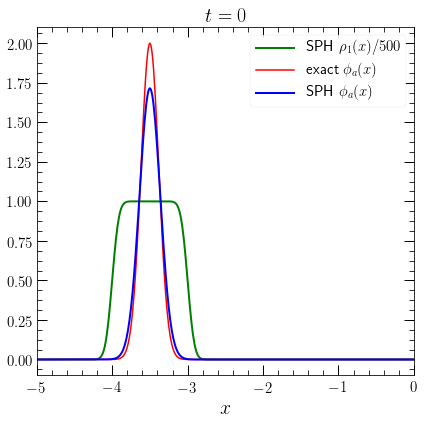

In [4]:
#initial setup
v = np.sqrt(3.)/2.
x = np.linspace(-5., 5., 1001)
sigma = 1./6. 
dx = x[1] - x[0]
u0 = np.zeros(len(x))
idx = (x > -4) & (x < -3)
u0[idx] = 2.0 * np.exp(-(x[idx]+3.5)**2/sigma**2) # * (-2.*(x[idx]+3.5)/sigma**2) # gaussian
#u0[idx] = -x[idx]   # triangle

fig1 = plt.figure(figsize=(6,6))
ax = fig1.add_subplot(1,1,1) 

ax.plot(x_pts, rho_init_pts, color='green', label=rf'SPH $\rho_1(x)/500$')
ax.plot(x, u0, color='red', label='exact $\phi_a(x)$', lw=1.5)
ax.plot(x_pts, weight_init_pts, color='blue', label='SPH $\phi_a(x)$')

ax.set_xlim(-5,0)
ax.set_xlabel('$x$')
ax.set_title('$t=0$')
ax.legend();

fig1.tight_layout()
fig1.savefig('shockwave_init_gauss.png', bbox_inches='tight', dpi = 200.)

In [5]:
def get_analytic_solution(u0, delta_x, delta_t, n_step):
    u_analytic = np.zeros(len(u0))
    x_shift = (int)(n_step*delta_t/delta_x*v)
    u_analytic[x_shift:] = u0[:-x_shift]
    return(u_analytic)

In [6]:
dt = 0.01       # make sure delta_t/delta_x < 1
nt_1 = 200      # evolve 200 time step
u_analytic_1 = get_analytic_solution(u0, dx, dt, nt_1)

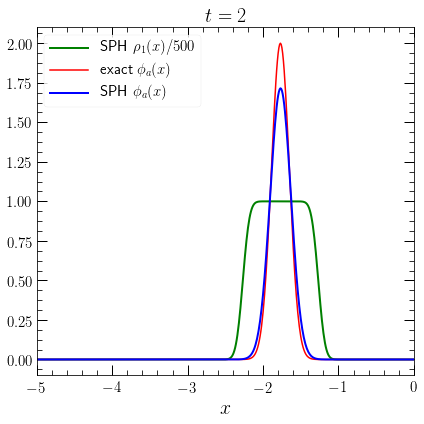

In [7]:
fig2 = plt.figure(figsize=(6,6))
ax = fig2.add_subplot(1,1,1) 

ax.plot(x_pts, rho_1_pts, color='green', label=rf'SPH $\rho_1(x)/500$')
ax.plot(x_pts, u_analytic_1, color='red', label='exact $\phi_a(x)$', lw=1.5)
ax.plot(x_pts, weight_1_pts, color='blue', label='SPH $\phi_a(x)$')

ax.set_xlim(-5,0)
ax.set_xlabel('$x$')
ax.set_title('$t=2$')
ax.legend();

fig2.tight_layout()
fig2.savefig('shockwave_t_2_gauss.png', bbox_inches='tight', dpi = 200.)

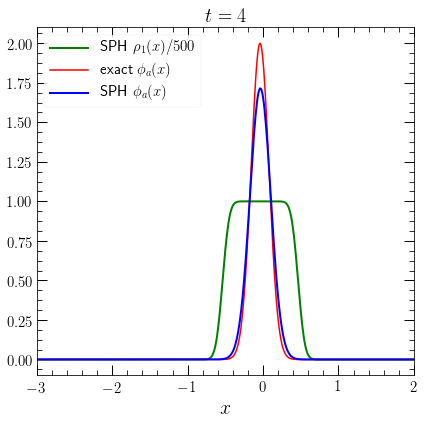

In [8]:
nt_2 = 400         # evolve 400 time step
u_analytic_2 = get_analytic_solution(u0, dx, dt, nt_2)

fig3 = plt.figure(figsize=(6,6))
ax = fig3.add_subplot(1,1,1) 

ax.plot(x_pts, rho_2_pts, color='green', label=rf'SPH $\rho_1(x)/500$')
ax.plot(x_pts, u_analytic_2, color='red', label='exact $\phi_a(x)$', lw=1.5)
ax.plot(x_pts, weight_2_pts, color='blue', label='SPH $\phi_a(x)$')

ax.set_xlim(-3,2)
ax.set_xlabel('$x$')
ax.set_title('$t=4$')
ax.legend();

fig3.tight_layout()
fig3.savefig('shockwave_t_4_gauss.png', bbox_inches='tight', dpi = 200.)